In [1]:
cd D:\Users\Niels\Documents\Machine learning\python\ING

D:\Users\Niels\Documents\Machine learning\python\ING


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def makeFactorHistogram(factor, signal, minBin, maxBin, nBins):
    # Make a set of bins
    bins = np.linspace(minBin, maxBin, nBins)
    # Assign the factor values to bin numbers
    bin_numbers = np.digitize(factor, bins, right=False)
    
    # Total number of factor points per bin
    total_counts = np.zeros(nBins + 1)
    # Total signal per bin
    signal_counts = np.zeros(nBins + 1)

    # Loop through factor bin values
    for i, v in enumerate(bin_numbers):
        total_counts[v] += 1
        signal_counts[v] += signal[i]

    # Calculate the probability
    bin_probability = np.zeros(nBins + 1)
    for i in range(nBins + 1):
        if total_counts[i] > 0:
            bin_probability[i] = signal_counts[i]/total_counts[i]
        total_counts[i] /= len(bin_numbers)

    return bins, bin_probability, total_counts 

In [4]:
#data = pd.read_csv("train - subsample.csv")
data = pd.read_csv("train.csv")
print(data.head())
data_orig = data
print(data["bankrupt"].sum())
print("Number of lines: {} Default probability: {}".format(len(data.index), data["bankrupt"].sum()/len(data.index)))

   num_employees country                                      industry_desc  \
0          50253      CN  Nonscheduled Chartered Freight Air Transportat...   
1           1847      CN                 Offices of Real Estate Appraisers    
2          16184      CN                 Nuclear Electric Power Generation    
3             25      TR                   Ready-Mix Concrete Manufacturing   
4           4968      CN  Motor Vehicle Electrical and Electronic Equipm...   

   A_score  B_score  C_score  D_score  revenue2014  revenue2015  revenue2016  \
0      3.0      3.0      3.0      3.0          108          396          629   
1      2.0      2.0      4.0      NaN          956          647          513   
2      3.0      4.0      NaN      4.0          901         1930         3022   
3      2.0      2.0      2.0      NaN        11267         7787         6598   
4      NaN      3.0      2.0      5.0         2481         4512         9195   

   bankrupt  
0         0  
1         0  
2 

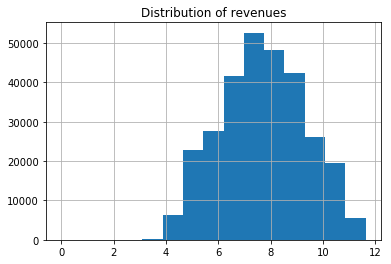

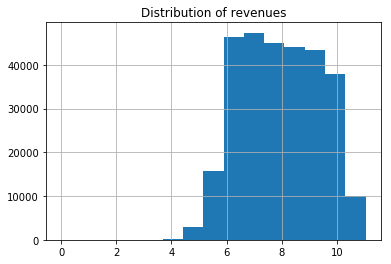

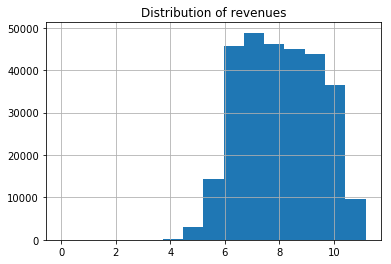

In [10]:
labels = ["revenue2014", "revenue2015", "revenue2016"]
for label in labels:
    min_value = np.min(data[label].values)
    histRev = data[label].apply(lambda x: np.log(x - (min_value - 1))).hist(bins=15)
    #histRev = data[label].hist(bins=15)
    histRev.plot()
    plt.title("Distribution of revenues")
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


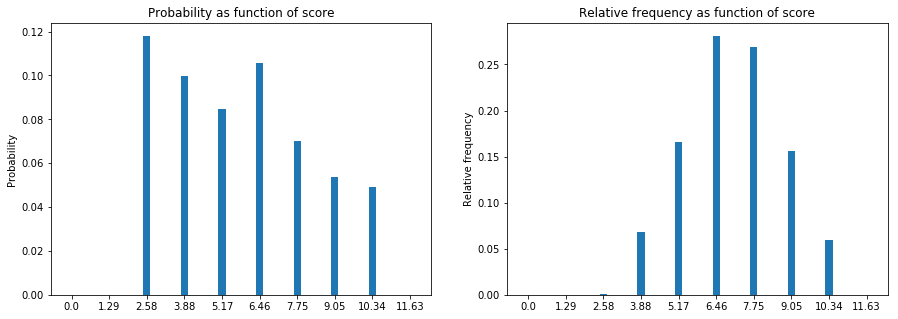

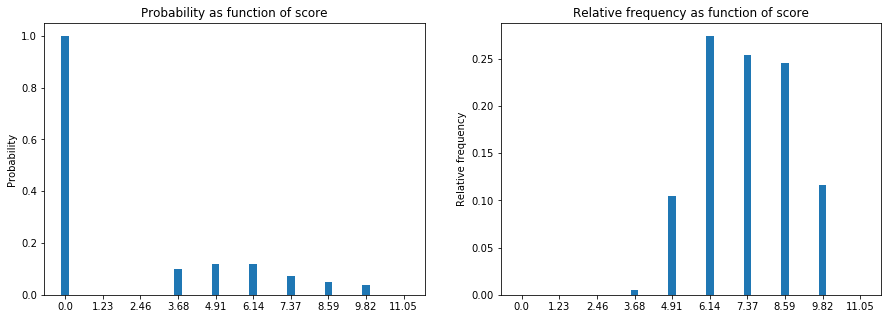

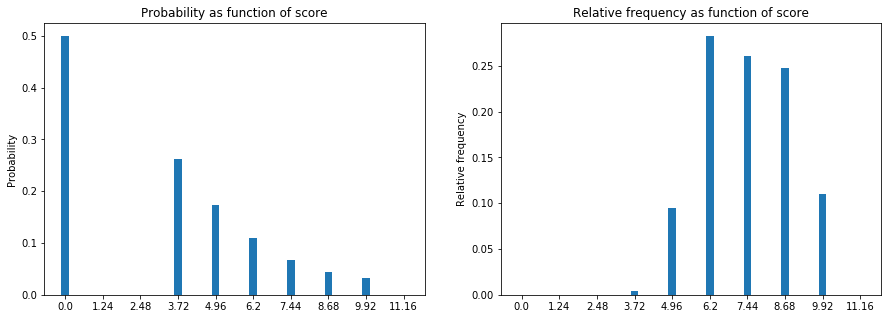

In [11]:
# Expore revenues
labels = ["revenue2014", "revenue2015", "revenue2016"]
for label in labels:
    subData = data[[label,"bankrupt"]]
    # Transform
    min_value = np.min(subData[label].values)
    subData[label] = subData[label].apply(lambda x: np.log(x - (min_value - 1)))

    nbins = 10
    min_value = 0.
    max_value = np.max(subData[label].values)
    bins, bankruptcy_prob, count_fraction = makeFactorHistogram(subData[label].values, subData["bankrupt"].values, min_value, max_value, nbins)
    
    plt.subplots(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    plt.bar(bins, bankruptcy_prob[1:], align='center', width=0.25)
    plt.xticks(bins, np.round(bins,2))
    plt.ylabel('Probability')
    plt.title('Probability as function of score')

    plt.subplot(1, 2, 2)
    plt.bar(bins, count_fraction[1:], align='center', width=0.25)
    plt.xticks(bins, np.round(bins,2))
    plt.ylabel('Relative frequency')
    plt.title('Relative frequency as function of score')

    plt.show()
    

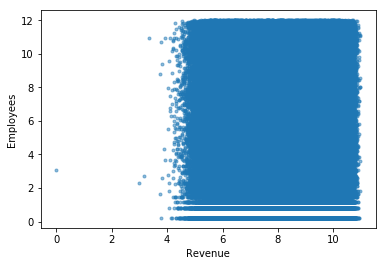

In [47]:
# Expore revenues. 
revenues = data[["revenue2014", "revenue2015", "revenue2016"]]
mean_revenues = revenues.mean(axis=1).to_frame()
mean_revenues.columns = ["revenues"]
min_revenues = np.min(mean_revenues["revenues"].values)
mean_revenues["revenues"] = mean_revenues["revenues"].apply(lambda x: np.log(x - min_revenues + 1))
mean_revenues = mean_revenues.join(data["bankrupt"])
#print(mean_revenues.head(20))

# Histogram of revenues
histRev = mean_revenues["revenues"].hist(bins=15)
histRev.plot()
plt.title("Distribution of revenues") 

# Check (log) revenues vs. (log) number of employees
#plt.scatter(mean_revenues["revenues"].values, data["log_num_employees"].values, alpha=0.5, marker=".")
#plt.xlabel("Revenue")
#plt.ylabel("Employees")
#plt.show()

# Check bankruptcy dependence on log of revenues

In [15]:
# Calculate the revenue momentum
slopes=[]
for index, d in data.iterrows():
    #m = np.mean(d.values[7:10])
    m = np.mean(np.array([d.values[7],d.values[9]]))
    #b =np.polyfit(np.array([1, 2, 3]), d.values[7:10], 1)
    b =np.polyfit(np.array([1, 2]), np.array([d.values[7],d.values[9]]), 1)
    slopes.append(b[0]/m)
#print(slopes)

In [17]:
revenues_mom = pd.DataFrame(slopes, columns=["slope"])
revenues_mom = revenues_mom.join(data["bankrupt"])
print(revenues_mom.head())

      slope  bankrupt
0  1.413840         0
1 -0.603131         0
2  1.081315         0
3 -0.522698         0
4  1.150051         1


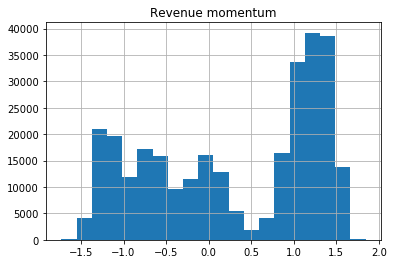

In [21]:
# Plot the revenue momentum
histRev = revenues_mom["slope"].hist(bins=20)
histRev.plot()
plt.title("Revenue momentum") 
plt.show()

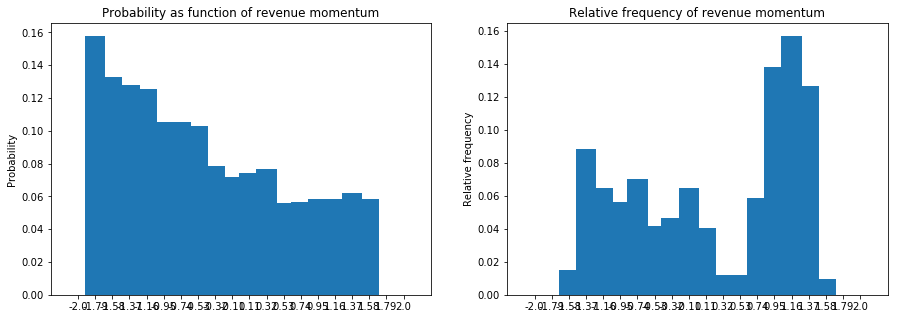

In [20]:
bins, bankruptcy_prob, count_fraction = makeFactorHistogram(revenues_mom["slope"].values, revenues_mom["bankrupt"].values, -2. , 2., 20)

plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(bins, bankruptcy_prob[1:], align='center', width=0.25)
plt.xticks(bins, np.round(bins,2))
plt.ylabel('Probability')
plt.title('Probability as function of revenue momentum')

plt.subplot(1, 2, 2)
plt.bar(bins, count_fraction[1:], align='center', width=0.25)
plt.xticks(bins, np.round(bins,2))
plt.ylabel('Relative frequency')
plt.title('Relative frequency of revenue momentum')

plt.show()